## Image processing with openCV.

Применим классические методы обработки изображений.

In [3]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np

STAMP = 'img/stamp.jpg'
BOOK  = 'img/book.jpg'
LENA  = 'img/lena.jpg'
TABLE = 'img/table.jpg'

##### Задача 1
Convert the image to HSV color space. Adjust the thresholds for the desired axes to get the blue print image separate from the black text.

Переведём изображение **stamp.jpg** в цветовое пространство HSV. Подберём пороги для нужных осей, чтобы получить изображение синей печати отдельно от чёрного текста. Переведём полученное изображение обратно в RGB и отобразим результат. 

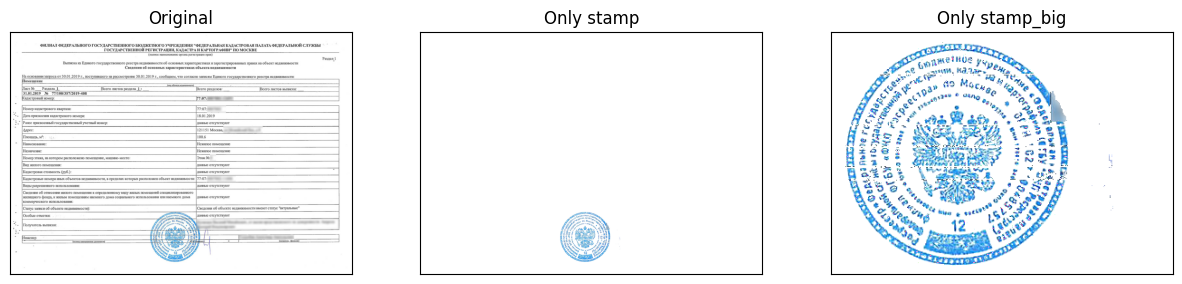

In [4]:
stamp = cv2.imread(STAMP)
# переведём в пространство HSV
stamp_hsv = cv2.cvtColor(stamp, cv2.COLOR_BGR2HSV)

# выделим синий цвет печати
color_blue1 = (50, 30, 100)
color_blue2 = (115, 255, 255)

mask_blue = cv2.inRange(stamp_hsv, color_blue1, color_blue2)
img_stamp = cv2.bitwise_or(stamp, stamp, mask=mask_blue)

# делаем белым задний фон
threshold =  img_stamp < 1
img_stamp[threshold] = 255

# увеличение изображения печати
w,h,c = img_stamp.shape
stamp_big = img_stamp[int(w*8.8/12):int(w*11.5/12), int(h*4.8/12):int(h*7.5/12)]

# отобразим результат
plt.figure(figsize=[15,10])
plt.subplot(131)
plt.imshow(stamp[:, :, ::-1],cmap='gray')
plt.title("Original")
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(img_stamp[:, :, ::-1])
plt.title("Only stamp")
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(stamp_big[:, :, ::-1])
plt.title("Only stamp_big")
plt.xticks([]), plt.yticks([])

plt.show()

##### Задача 2

Convert the image to grayscale. Apply to the gray image the linear stretching of the brightness range ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) and the histogram equalization ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Plot the difference between the results.

Переведём изображение **book.jpg** в градации серого. Применим к серому изображению операцию линейного растяжения диапазона яркостей ( 𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒 ) и эквализации гистограммы ( 𝑒𝑞𝑢𝑎𝑙𝑖𝑧𝑒𝐻𝑖𝑠𝑡 ). Построим разность полученных результатов. Состыкуем в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности

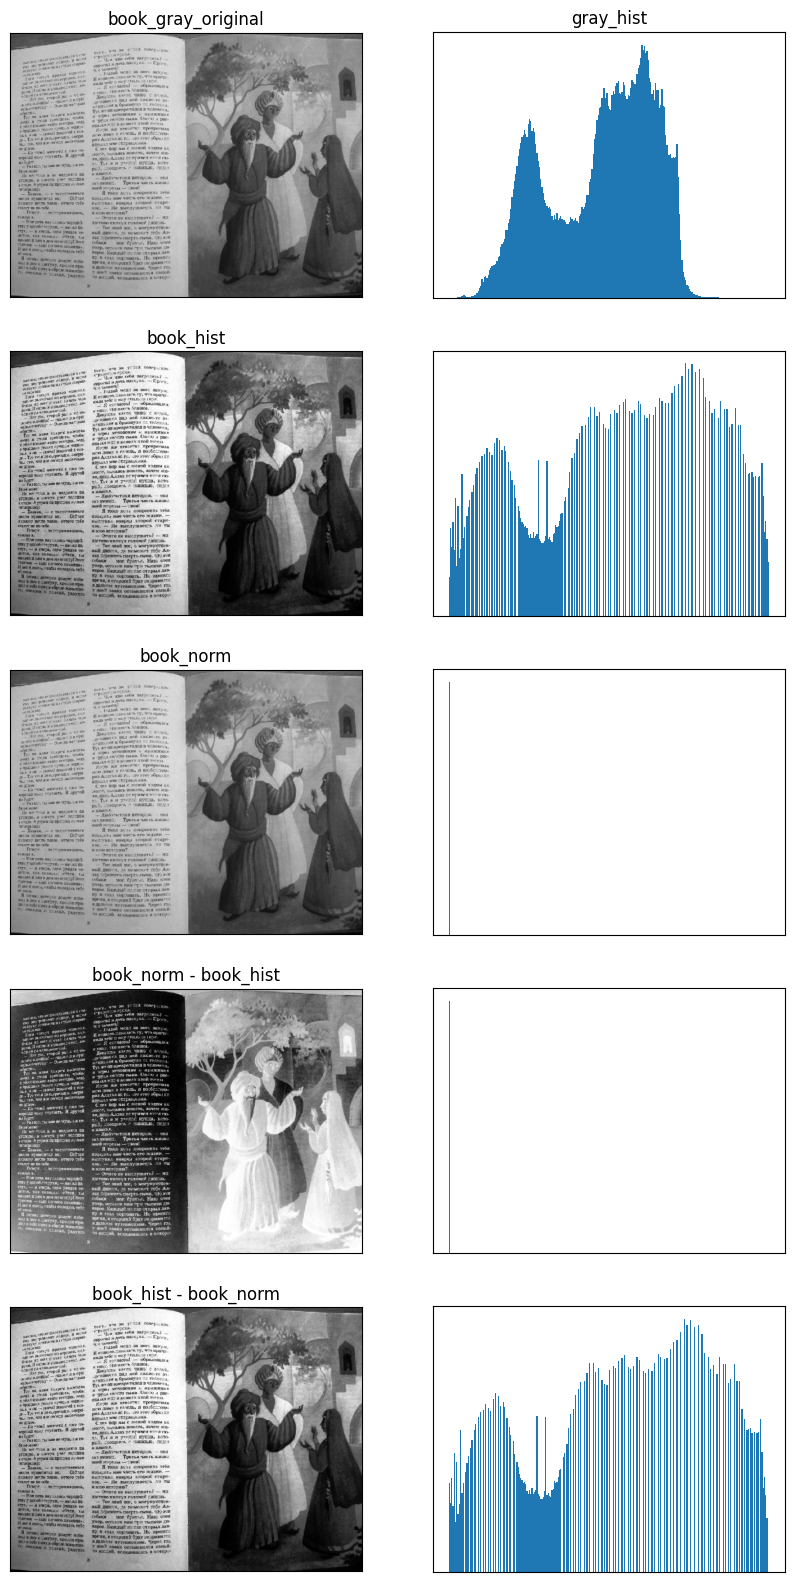

In [5]:
img_book = cv2.imread(BOOK)

# переводим в градации серого
book_gray = cv2.cvtColor(img_book, cv2.COLOR_BGR2GRAY)

# операция эквализации гистограммы
book_hist = cv2.equalizeHist(book_gray)

# операция линейного растяжения диапазона яркостей
book_normalized = cv2.normalize(book_gray, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# разность полученных результатов
book_dif = book_hist - book_normalized

# отобразим результат
plt.figure(figsize=[10,20])

plt.subplot(521)
plt.imshow(book_gray,cmap='gray')
plt.title("book_gray_original")
plt.xticks([]), plt.yticks([])

plt.subplot(522)
plt.hist(book_gray.ravel(),256,[0,256])
plt.title("gray_hist")
plt.xticks([]), plt.yticks([])

plt.subplot(523)
plt.imshow(book_hist,cmap='gray')
plt.title("book_hist")
plt.xticks([]), plt.yticks([])

plt.subplot(524)
plt.hist(book_hist.ravel(),256,[0,256])
plt.xticks([]), plt.yticks([])

plt.subplot(525)
plt.imshow(book_normalized,cmap='gray')
plt.title("book_norm")
plt.xticks([]), plt.yticks([])

plt.subplot(526)
plt.hist(book_normalized.ravel(),256,[0,256])
plt.xticks([]), plt.yticks([])

plt.subplot(527)
plt.imshow(-book_dif,cmap='gray')
plt.title("book_norm - book_hist")
plt.xticks([]), plt.yticks([])

plt.subplot(528)
plt.hist(-book_dif.ravel(),256,[0,256])
plt.xticks([]), plt.yticks([])

plt.subplot(529)
plt.imshow(book_dif,cmap='gray')
plt.title("book_hist - book_norm")
plt.xticks([]), plt.yticks([])

plt.subplot(5,2,10)
plt.hist(book_dif.ravel(),256,[0,256])
plt.xticks([]), plt.yticks([])

plt.show()

##### Задача 3
Apply gamma transform of the image

Выберемпо два произвольных знаяения для каждого параметра гамма-коррекции ($\Gamma = ..$, $c = ..$). Получится 4 различных комбинации. Применим гамма-преобразование изображения **book.jpg** для каждой комбинации параметров. Отобразим исходное изображение **book.jpg** и его гамма-преобразования.

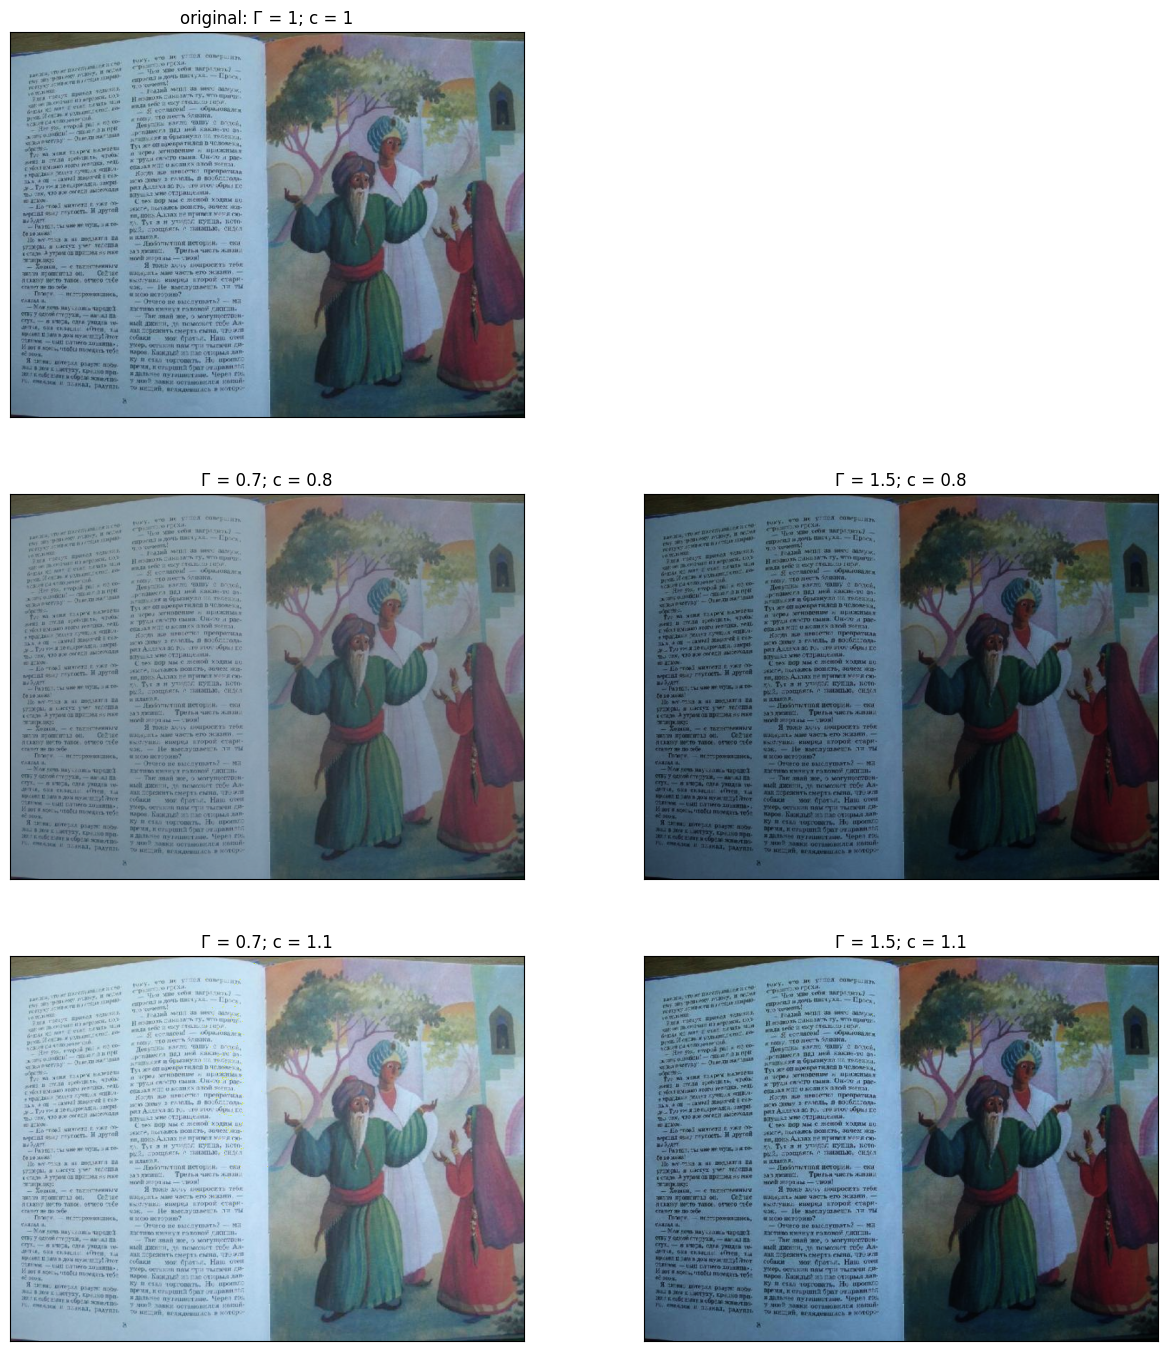

In [6]:
img_book = cv2.imread(BOOK)

def gammaCorrection(src: np.ndarray, gamma: float, c: float) -> np.ndarray:
    """
    Применим формулу dst = c*src**Г
    При Г = 1 - исходное изображение, при Г < 1 - светлее, при Г > 1 - темнее.
    При с = 1 - исходное изображение.

    Args:
        src (numpy.ndarray): исходное изображение
        gamma (float): параметр Г
        c (float): параметр с

    Returns:
        dst (numpy.ndarray): изображение после гамма-преобразования
    """

    table = [c*((i / 255) ** gamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
    return cv2.LUT(src, table)

# отобразим результат при Г = [0.7, 0.5], c = [0.8, 1.1]
plt.figure(figsize=[15,17])

plt.subplot(321)
plt.imshow(gammaCorrection(img_book, 1, 1)[:, :, ::-1],cmap='gray')
plt.title("original: Г = 1; c = 1")
plt.xticks([]), plt.yticks([])

plt.subplot(323)
plt.imshow(gammaCorrection(img_book, 0.7, 0.8)[:, :, ::-1],cmap='gray')
plt.title("Г = 0.7; c = 0.8")
plt.xticks([]), plt.yticks([])

plt.subplot(324)
plt.imshow(gammaCorrection(img_book, 1.5, 0.8)[:, :, ::-1],cmap='gray')
plt.title("Г = 1.5; c = 0.8")
plt.xticks([]), plt.yticks([])

plt.subplot(325)
plt.imshow(gammaCorrection(img_book, 0.7, 1.1)[:, :, ::-1],cmap='gray')
plt.title("Г = 0.7; c = 1.1")
plt.xticks([]), plt.yticks([])

plt.subplot(326)
plt.imshow(gammaCorrection(img_book, 1.5, 1.1)[:, :, ::-1],cmap='gray')
plt.title("Г = 1.5; c = 1.1")
plt.xticks([]), plt.yticks([])

plt.show()

##### Задача 4
Filter the image in the frequency domain with an ideal low-pass filter and an ideal high-pass filter.

Загрузим изображение **lena.jpg**. Переведём изображение в градации серого. Произведём фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра построим состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации.

In [7]:
def LPF(src: np.ndarray, D: int) -> np.ndarray:
    """
    Low Pass Filter.
    Фильтрация изображения в частотной области идеальным фильтром низких частот.

    Фильтр, обрезающий все высокочастотные составляющие Фурье-образа,
    находящиеся на большем расстоянии от начала координат,
    чем некоторое заданное расстояние D

    Args:
        src (numpy.ndarray): исходное изображение в пространственной области
        D (int): расстояние D, дальше которого зануляется Фурье-образ

    Returns:
        img_back (numpy.ndarray): полученное изображение в пространственной области
        img_back_f (numpy.ndarray): полученное изображение в частотной области 

    """

    rows, cols = src.shape
    dft = cv2.dft(np.float32(src),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    crow,ccol = int(rows/2) , int(cols/2)
    # создаём маску: центральный квадрат равен 1, а остальные - нули
    mask = np.zeros((rows,cols,2), np.uint8)
    mask[(crow-D):(crow+D), (ccol-D):(ccol+D)] = 1
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    img_back_f = np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
    return img_back, img_back_f

def HPF(src: np.ndarray, D: int) -> np.ndarray:
    """
    High Pass Filter.
    Фильтрация изображения в частотной области идеальным фильтром высоких частот.

    Фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, 
    находящиеся на меньшем расстоянии от начала координат, 
    чем некоторое заданное расстояние D

    Args:
        src (numpy.ndarray): исходное изображение в пространственной области
        D (int): расстояние D, на котором зануляется Фурье-образ

    Returns:
        img_back (numpy.ndarray): полученное изображение в пространственной области
        img_back_f (numpy.ndarray): полученное изображение в частотной области 
    """
    rows, cols = src.shape
    dft = cv2.dft(np.float32(src),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    crow,ccol = int(rows/2) , int(cols/2)
    fshift = dft_shift
    fshift[crow-D:crow+D, ccol-D:ccol+D] = 0
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    img_back_f= np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
    return img_back, img_back_f

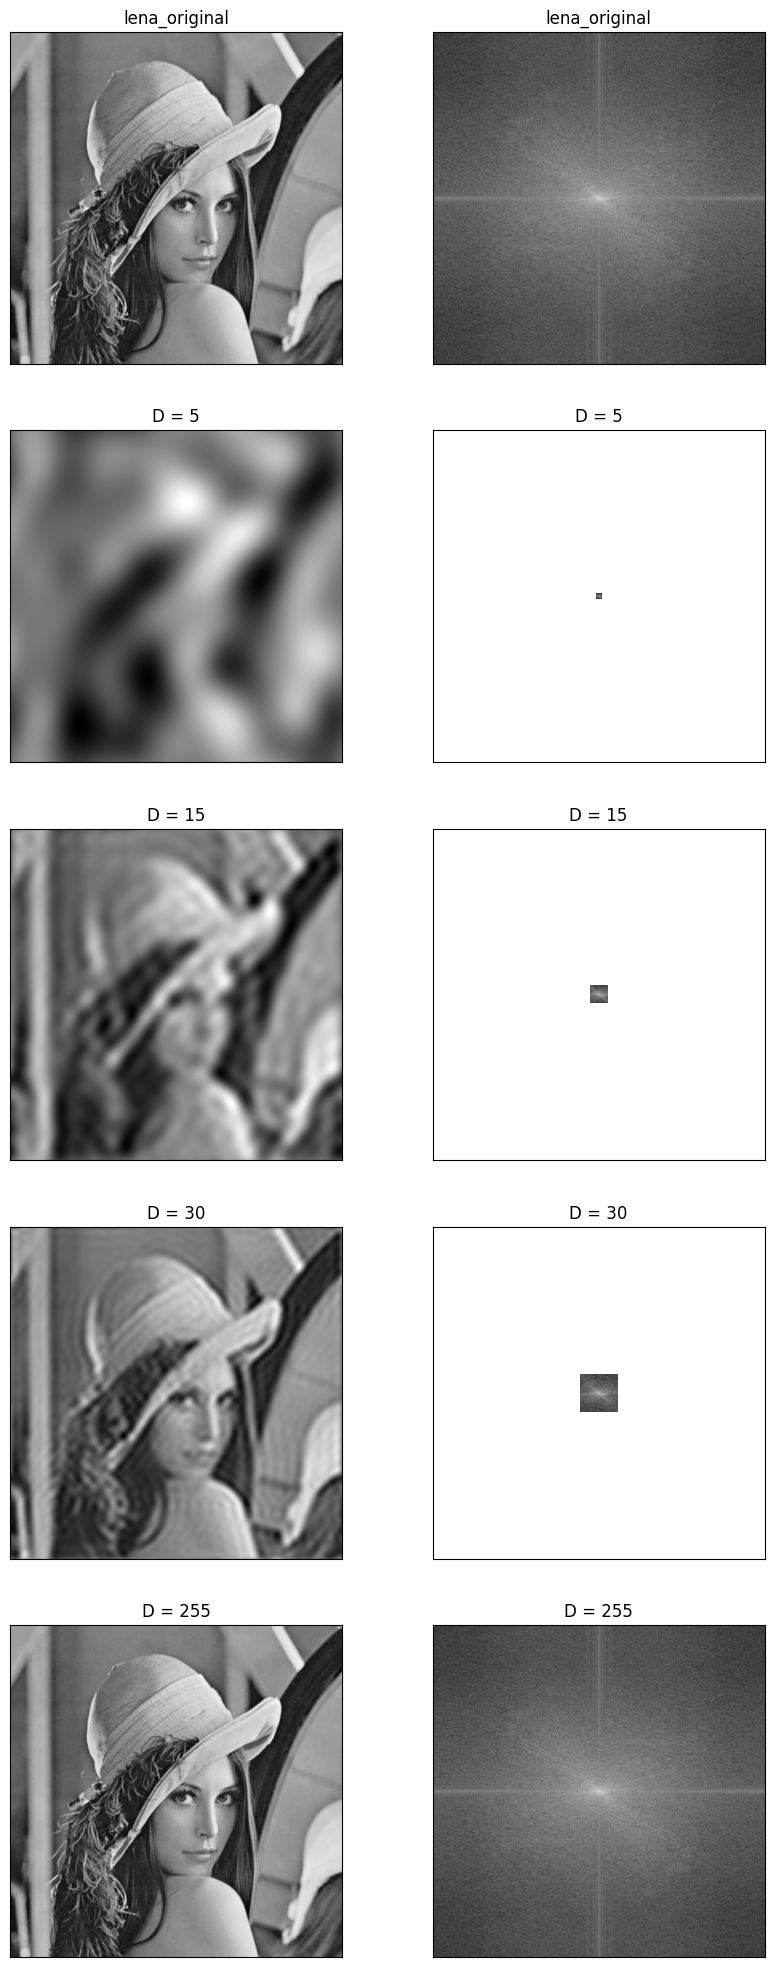

In [8]:
img_lena = cv2.imread(LENA)
lena_gray = cv2.cvtColor(np.float32(img_lena), cv2.COLOR_BGR2GRAY)

# применим преобразование Фурье 
dft = cv2.dft(np.float32(lena_gray),flags = cv2.DFT_COMPLEX_OUTPUT)
# переместим начало координат в центр изображения
dft_shift = np.fft.fftshift(dft)
# применим логарифмическую коррекцию
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# постройим изображение для фильтра низких частот при D = [5, 15, 30, 255]
low_5, low_f_5 = LPF(lena_gray, 5)
low_15, low_f_15 = LPF(lena_gray, 15)
low_30, low_f_30 = LPF(lena_gray, 30)
low_255, low_f_255 = LPF(lena_gray, 2555)

plt.figure(figsize=[10,25])

plt.subplot(521);
plt.imshow(lena_gray, cmap='gray');
plt.title("lena_original")
plt.xticks([]), plt.yticks([])
plt.subplot(522);
plt.imshow(magnitude_spectrum,cmap='gray');
plt.title("lena_original")
plt.xticks([]), plt.yticks([])

plt.subplot(523);
plt.imshow(low_5, cmap='gray');
plt.title("D = 5")
plt.xticks([]), plt.yticks([])
plt.subplot(524);
plt.imshow(low_f_5,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 5")

plt.subplot(525);
plt.imshow(low_15, cmap='gray');
plt.title("D = 15")
plt.xticks([]), plt.yticks([])
plt.subplot(526);
plt.imshow(low_f_15,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 15")

plt.subplot(527);
plt.imshow(low_30, cmap='gray');
plt.title("D = 30")
plt.xticks([]), plt.yticks([])
plt.subplot(528);
plt.imshow(low_f_30,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 30")

plt.subplot(529);
plt.imshow(low_255, cmap='gray');
plt.title("D = 255")
plt.xticks([]), plt.yticks([])
plt.subplot(5,2,10);
plt.imshow(low_f_255,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 255")

plt.show()

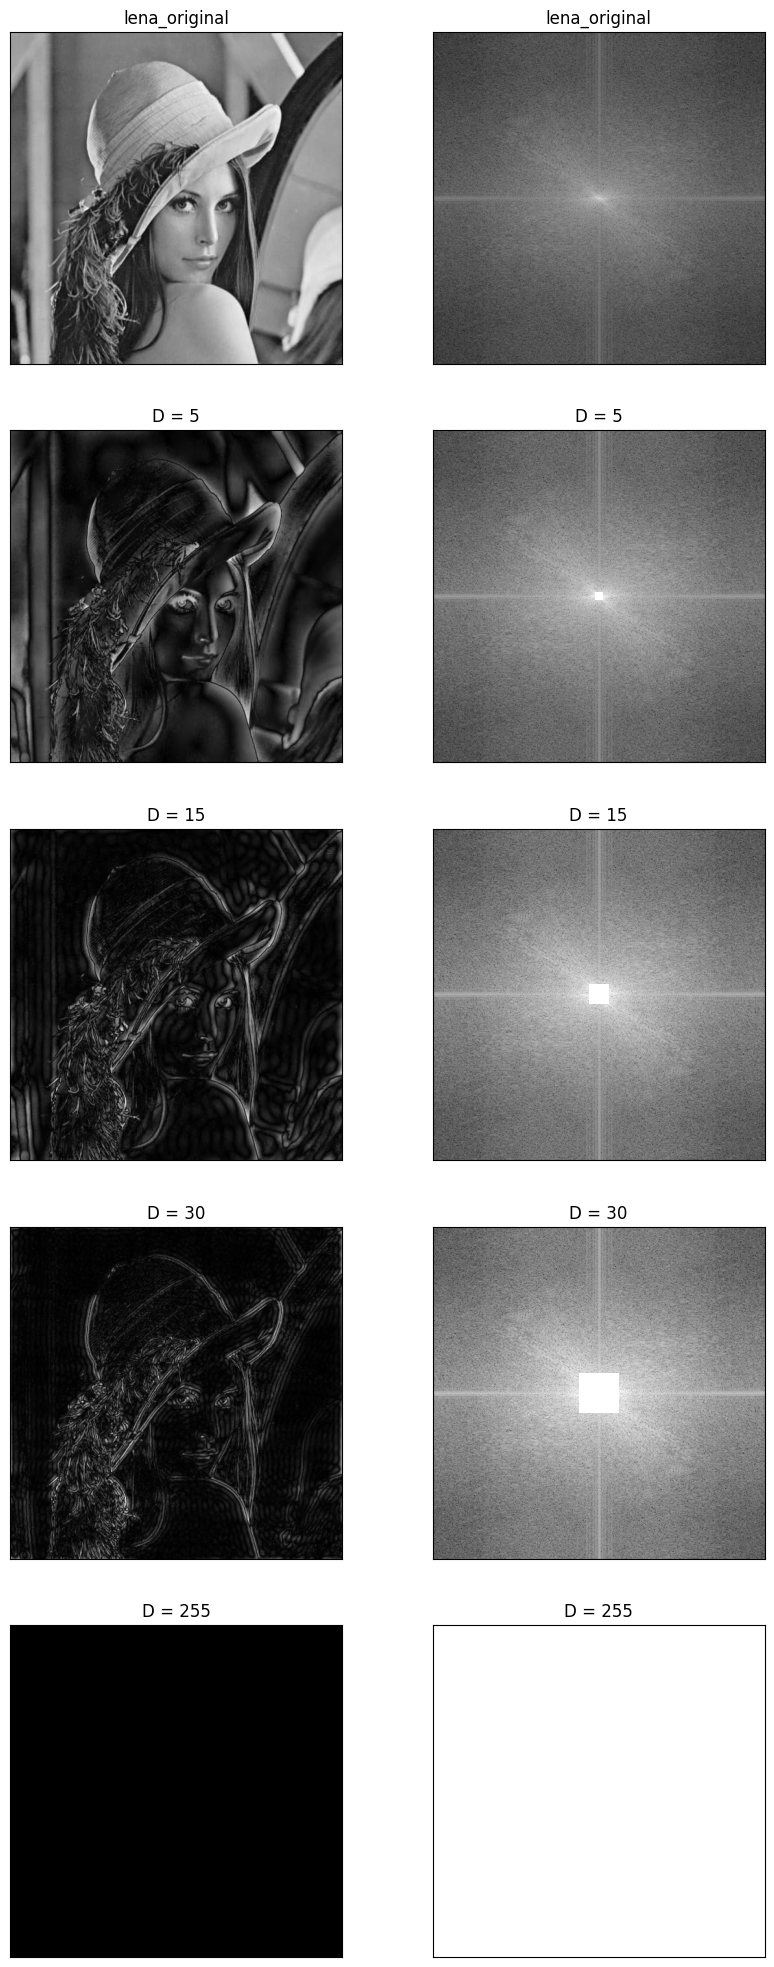

In [9]:
# постройим изображение для фильтра высоких частот при D = [5, 15, 30, 255]
high_5, high_f_5 = HPF(lena_gray, 5)
high_15, high_f_15 = HPF(lena_gray, 15)
high_30, high_f_30 = HPF(lena_gray, 30)
high_255, high_f_255 = HPF(lena_gray, 2555)

plt.figure(figsize=[10,25])

plt.subplot(521);
plt.imshow(lena_gray, cmap='gray');
plt.title("lena_original")
plt.xticks([]), plt.yticks([])
plt.subplot(522);
plt.imshow(magnitude_spectrum,cmap='gray');
plt.title("lena_original")
plt.xticks([]), plt.yticks([])

plt.subplot(523);
plt.imshow(high_5, cmap='gray');
plt.title("D = 5")
plt.xticks([]), plt.yticks([])
plt.subplot(524);
plt.imshow(high_f_5,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 5")

plt.subplot(525);
plt.imshow(high_15, cmap='gray');
plt.title("D = 15")
plt.xticks([]), plt.yticks([])
plt.subplot(526);
plt.imshow(high_f_15,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 15")

plt.subplot(527);
plt.imshow(high_30, cmap='gray');
plt.title("D = 30")
plt.xticks([]), plt.yticks([])
plt.subplot(528);
plt.imshow(high_f_30,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 30")

plt.subplot(529);
plt.imshow(high_255, cmap='gray');
plt.title("D = 255")
plt.xticks([]), plt.yticks([])
plt.subplot(5,2,10);
plt.imshow(high_f_255,cmap='gray');
plt.xticks([]), plt.yticks([])
plt.title("D = 255")

plt.show()

##### Задача 5
Select table borders in the image using morphological operations.

Выделим в изображении **table.jpg** границы таблицы с использованием морфологических операций. Результат обработки - изображение, в котором присутствует текст и удалены все стороны таблицы.

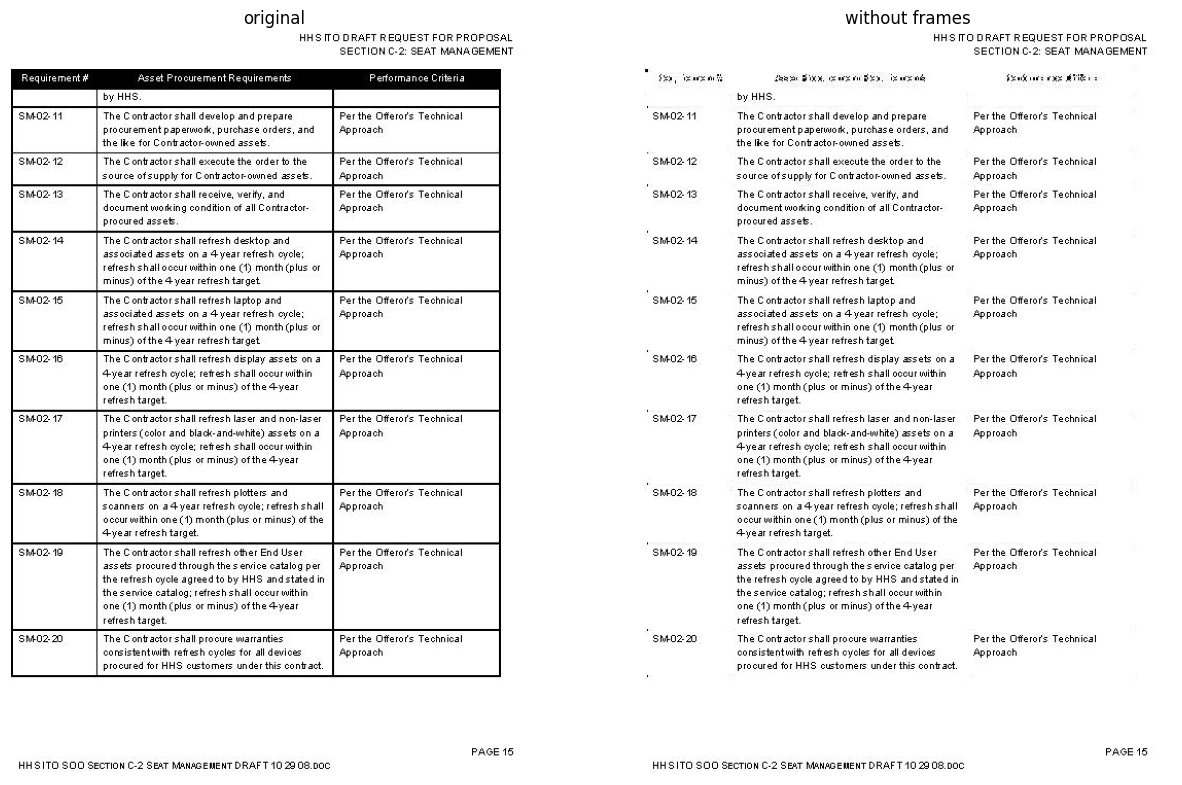

In [10]:
img_table = cv2.imread(TABLE)
img_gray = cv2.cvtColor(img_table, cv2.COLOR_BGR2GRAY)

# для выделения горизонтальных прямых
morph_kernel_horiz = np.array( [[1,1,1,1]], np.uint8)
# для выделения вертикальных прямых
morph_kernel_vertic = np.array( [[1], [1], [1], [1]], np.uint8)

dilate_img_horiz = cv2.dilate(img_gray, kernel= morph_kernel_horiz, iterations=3)
dilate_img_vertic = cv2.dilate(img_gray, kernel= morph_kernel_vertic, iterations=3)

erode_img_horiz = cv2.erode(dilate_img_horiz, kernel= morph_kernel_horiz, iterations=3)
erode_img_vertic = cv2.erode(dilate_img_vertic, kernel= morph_kernel_vertic, iterations=3)
reverce_horiz = cv2.bitwise_not(erode_img_horiz)
reverce_vertic = cv2.bitwise_not(erode_img_vertic)

col_row = cv2.bitwise_or(reverce_horiz, reverce_vertic)
result = cv2.bitwise_or(col_row, img_gray)
plt.figure(figsize=[15,25])

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("original")
plt.xticks([]), plt.yticks([])
plt.box(False)

plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.title("without frames")
plt.xticks([]), plt.yticks([])
plt.box(False)

plt.show()